In [2]:
import pandas as pd
from sklearn import linear_model

In [3]:
import pandas as pd
df=pd.read_excel('homeprices.xlsx','Sheet3')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


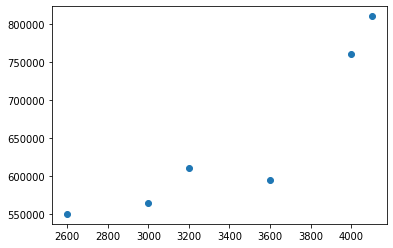

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['area'],df['price'])

In [5]:
x=df['bedrooms'].median()
x

4.0

In [6]:
df['bedrooms'].mean()

4.2

In [7]:
df['bedrooms']=df['bedrooms'].fillna(x)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [8]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df['price'])

LinearRegression()

In [9]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [10]:
reg.intercept_

221323.00186540443

In [11]:
reg.predict([[3000, 3, 40]])

array([498408.25158031])

In [12]:
reg.predict([[2500, 4, 5]])

array([578876.03748933])

In [13]:
import pandas as pd
df=pd.read_excel('hiring.xlsx')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($),Unnamed: 4
0,NaN,8.0,9,50000,NaN
1,NaN,8.0,6,45000,NaN
2,five,6.0,7,60000,NaN
3,two,10.0,10,65000,NaN
4,seven,9.0,6,70000,NaN
5,three,7.0,10,62000,NaN
6,ten,NaN,7,72000,NaN
7,eleven,7.0,8,80000,NaN


In [14]:
df.dropna(how='all', axis='columns',inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [15]:
df['experience']=df['experience'].fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [16]:
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [17]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [18]:
y=df['test_score(out of 10)'].median()
y

8.0

In [19]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(y)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [20]:
from sklearn import linear_model
reg1=linear_model.LinearRegression()
reg1.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [21]:
reg1.predict([[2,9,6]])

array([53205.96797671])

In [29]:
reg1.predict([[12,10,10]])

array([92002.18340611])

In [23]:
import math
median_test_score = math.floor(df['test_score(out of 10)'].mean())
median_test_score

7

In [26]:
df['test_score(out of 10)'].mean()

7.875

In [27]:
import pickle

In [33]:
with open('reg1_pickle','wb') as file:
    pickle.dump(reg1,file)

In [34]:
with open('reg1_pickle','rb') as file:
    mp=pickle.load(file)

In [39]:
mp.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [40]:
mp.intercept_

17737.263464337695

In [50]:
import sklearn.externals as extjoblib
import joblib

In [51]:
joblib.dump(reg,'reg_joblib')

['reg_joblib']

In [54]:
mq=joblib.load('reg_joblib')

In [55]:
mq.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [56]:
mq.intercept_

221323.00186540443

In [58]:
mq.predict([[3000, 3, 40]])

array([498408.25158031])